<h1>16 Personalities </h1>

<h2>1) Understand the classification task for your dataset </h2>
<p> The dataset chosen is a synthetic dataset created for practicing classification on for the results of the Myers-Briggs 16 Personality Test. The test has 60 questions. Each question can be answered by choosing a circle from a 7-point scale ranging from Agree to Disagree. After answering all the questions, the test will assign you one of the 16 different 4-letter Myers-Briggs personality types, based on your answers. Since each question tests for certain traits pertaining to different personality types, the answer to each question of the test can be considered as the features for determining what result a person taking the test will get. This dataset will require a multi-class classification, as each of the 16 personality types will be a class. The goal of this classification is to accurately identify which personality type the sample scored given their answers to the questions of the test.</p>

<h3>Brief Explanation of the Myers-Briggs typing system</h3>
<p>Each Myers-Briggs personality type(MBTI) consists of 4 letters, each representing one of a 2-letter dichotomy. The first letter, E/I represents Extroversion/Introversion. The second letter, N/S, represents Intuition/Sensing. The third letter, F/T, represents Feeling/Thinking. And the final letter, J/P, represents Judging/Perceiving. For example, the ENFJ would be interpreted as Extroversion, Intuition, Feeling, Judging.</p>

<h2>2) Analyze your dataset</h2>
<p> This dataset contains 59999 samples. Each of the 60 questions is a feature. The dataset also contains 2 additional features, a Response Id for identifying each sample and the Personality, which is the test result of each sample and as such the target of the classification. </p>

<h2>3) Feature Engineering</h2>
<p>Apart from each question of the test, another feature that may be helpful for the classification would be gender. There are certain personality types that are more prevalent in one gender over the other, for instance, Thinker types (types with XXTX like INTJ, ESTP, etc) are more common in males and may help the classifier in deducing a final type. Among the features provided, evidently the Response Id feature can be discarded as it is only included for identification purposes and is not correlated to the result.</p>

<h2> 4) Encode the features </h2>
<p>All the features take on a range of values from -3 to 3, representing the scale of Disagree to Agree with Disagree being -3 and Agree being 3. Although the features' values are discrete, they contain negative values which may have to be encoded for certain Naive Bayes classifiers, namely the MultinomialNB classifier for discrete features. As such all values were shifted by +3 such that -3 would be 0, -2 would be 1, -1 would be 2, so on and so forth.</p>

<p>In addition, since each personality is represented as a 4 character string, the Personality feature was encoded to a numeric value. Each personality is assigned a number from 0-15.</p>

<h2>5-9) Testing the data</h2>
<h3> Importing the Dataset </h3>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn import linear_model

%matplotlib inline

#helper function for concatenating numpy.ndarrays
def concatenate(a1,a2, start):
    index=start
    for x in a2:
        a1[index]=x
        index=index+1
    return a1

file=pd.read_csv('16P.csv', header = 0, encoding='cp1252')


 <h3>Encoding the features</h3>

In [ ]:
label_personality=LabelEncoder()
label_personality.fit(["ESTJ", "ENTJ", "ESFJ", "ENFJ", "ISTJ", "ISFJ", "INTJ", "INFJ", "ESTP", "ESFP", "ENTP", "ENFP", "ISTP", "ISFP","INTP", "INFP"])
file["Personality"]=label_personality.fit_transform(file["Personality"])
X=(file.drop("Personality", axis=1)).drop("Response Id", axis=1)
codes = {-3:0, -2:1, -1:2, 0:3, 1:4, 2:5, 3:6}

for features in X:
    X[features]=X[features].map(codes)

y=file['Personality']



<h3>Cross Validation</h3>
<p> For the cross-validation, we will be using th KFold library to split the dataset. The k-fold size used for this experiment was 5.<p>

In [ ]:
kf = KFold(n_splits=5, random_state=None, shuffle=False) 

<h3> Naive Bayes </h3>
<p>For Naive Bayes Classifier, we used the MultinomialNB library because the features values are discrete. </p>
<h4>Configuration 1</h4>
<p> For the first Naive Bayes classification, the default parameters were used. fit_prior=True, alpha=1.0</p>

In [ ]:
#Training
nb1_all_preds=np.ndarray(59999, int)
index=0
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    MNBclf = MultinomialNB()
    model = MNBclf.fit(X_train, y_train)
    preds = MNBclf.predict(X_test)
    nb1_all_preds=concatenate(nb1_all_preds, preds,index)
    index=index+(preds.size)
print(classification_report(y, nb1_all_preds))
print(confusion_matrix(y, nb1_all_preds))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      3743
           1       0.87      0.94      0.90      3760
           2       0.91      0.94      0.92      3737
           3       0.94      0.94      0.94      3760
           4       0.81      0.74      0.78      3746
           5       0.94      0.92      0.93      3769
           6       0.89      0.88      0.89      3759
           7       0.91      0.92      0.92      3749
           8       0.87      0.88      0.88      3761
           9       0.86      0.81      0.83      3734
          10       0.82      0.90      0.86      3743
          11       0.83      0.90      0.86      3742
          12       0.86      0.80      0.83      3739
          13       0.91      0.85      0.88      3746
          14       0.88      0.81      0.84      3756
          15       0.85      0.88      0.87      3755

    accuracy                           0.88     59999
   macro avg       0.88   

<h3>Configuration 2</h3>
<p>For this test, we set the fit_prior=False, alpha=1.0. The fit_prior parameter will use a uniform prior instead of learning the class prior probabilities.</p>

In [ ]:
#Training
nb2_all_preds=np.ndarray(59999, int)
index=0
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    MNBclf = MultinomialNB(fit_prior=False)
    model = MNBclf.fit(X_train, y_train)
    preds = MNBclf.predict(X_test)
    nb2_all_preds=concatenate(nb2_all_preds, preds,index)
    index=index+(preds.size)
print(classification_report(y, nb2_all_preds))
print(confusion_matrix(y, nb2_all_preds))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      3743
           1       0.88      0.94      0.90      3760
           2       0.91      0.94      0.92      3737
           3       0.94      0.94      0.94      3760
           4       0.81      0.74      0.78      3746
           5       0.94      0.92      0.93      3769
           6       0.89      0.88      0.89      3759
           7       0.91      0.92      0.92      3749
           8       0.87      0.88      0.88      3761
           9       0.86      0.81      0.83      3734
          10       0.82      0.90      0.86      3743
          11       0.83      0.90      0.86      3742
          12       0.86      0.81      0.83      3739
          13       0.91      0.85      0.88      3746
          14       0.88      0.81      0.84      3756
          15       0.85      0.89      0.87      3755

    accuracy                           0.88     59999
   macro avg       0.88   

<h3>Configuration 3</h3>
<p>For this test, we set the fit_prior=True, alpha=100. </p>

In [ ]:
#Training
nb3_all_preds=np.ndarray(59999, int)
index=0
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    MNBclf = MultinomialNB(alpha=100)
    model = MNBclf.fit(X_train, y_train)
    preds = MNBclf.predict(X_test)
    nb3_all_preds=concatenate(nb3_all_preds, preds,index)
    index=index+(preds.size)
print(classification_report(y, nb3_all_preds))
print(confusion_matrix(y, nb3_all_preds))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      3743
           1       0.87      0.94      0.90      3760
           2       0.91      0.94      0.92      3737
           3       0.94      0.94      0.94      3760
           4       0.82      0.74      0.78      3746
           5       0.94      0.92      0.93      3769
           6       0.89      0.88      0.89      3759
           7       0.91      0.92      0.92      3749
           8       0.88      0.88      0.88      3761
           9       0.86      0.81      0.83      3734
          10       0.82      0.90      0.86      3743
          11       0.82      0.90      0.86      3742
          12       0.86      0.80      0.83      3739
          13       0.91      0.85      0.88      3746
          14       0.88      0.81      0.84      3756
          15       0.85      0.89      0.87      3755

    accuracy                           0.88     59999
   macro avg       0.88   

<h2>Logistic Regression</h2>

<h3>Configuration 1</h3>

<p>For Configuration 1 we used the default parameters.</p>

In [ ]:
#Training
lr1_all_preds=np.ndarray(59999, int)
index=0
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = linear_model.LogisticRegression().fit(X, y)
    preds = clf.predict(X_test)
    lr1_all_preds=concatenate(lr1_all_preds, preds,index)
    index=index+(preds.size)
print(classification_report(y, lr1_all_preds))
print(confusion_matrix(y, lr1_all_preds))

C:\Users\sakee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sakee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3743
           1       0.94      0.94      0.94      3760
           2       0.95      0.95      0.95      3737
           3       0.95      0.95      0.95      3760
           4       0.88      0.87      0.87      3746
           5       0.95      0.95      0.95      3769
           6       0.93      0.94      0.94      3759
           7       0.94      0.94      0.94      3749
           8       0.93      0.92      0.92      3761
           9       0.90      0.90      0.90      3734
          10       0.89      0.91      0.90      3743
          11       0.92      0.92      0.92      3742
          12       0.90      0.90      0.90      3739
          13       0.92      0.91      0.92      3746
          14       0.91      0.90      0.90      3756
          15       0.91      0.92      0.91      3755

    accuracy                           0.92     59999
   macro avg       0.92   

C:\Users\sakee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h3>Configuration 2</h3>

<p>For Configuration 2 we used the default parameters except for fit_intercept which was changed from True to False.</p>

In [ ]:
#Training
lr2_all_preds=np.ndarray(59999, int)
index=0
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = linear_model.LogisticRegression(fit_intercept = False).fit(X, y)
    preds = clf.predict(X_test)
    lr2_all_preds=concatenate(lr2_all_preds, preds,index)
    index=index+(preds.size)
print(classification_report(y, lr2_all_preds))
print(confusion_matrix(y, lr2_all_preds))

C:\Users\sakee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sakee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3743
           1       0.94      0.94      0.94      3760
           2       0.95      0.95      0.95      3737
           3       0.95      0.95      0.95      3760
           4       0.88      0.87      0.87      3746
           5       0.95      0.95      0.95      3769
           6       0.93      0.94      0.94      3759
           7       0.94      0.94      0.94      3749
           8       0.93      0.92      0.92      3761
           9       0.90      0.90      0.90      3734
          10       0.89      0.91      0.90      3743
          11       0.92      0.92      0.92      3742
          12       0.90      0.90      0.90      3739
          13       0.92      0.91      0.92      3746
          14       0.91      0.90      0.91      3756
          15       0.91      0.92      0.91      3755

    accuracy                           0.92     59999
   macro avg       0.92   

C:\Users\sakee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h3>Configuration 3</h3>

<p>For Configuration 3 we used the default parameters except for the solver which was changed from 'lbgfs' to 'liblinear'.</p>

In [ ]:
#Training
lr3_all_preds=np.ndarray(59999, int)
index=0
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = linear_model.LogisticRegression(solver='liblinear').fit(X, y)
    preds = clf.predict(X_test)
    lr3_all_preds=concatenate(lr3_all_preds, preds,index)
    index=index+(preds.size)
print(classification_report(y, lr3_all_preds))
print(confusion_matrix(y, lr3_all_preds))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      3743
           1       0.93      0.94      0.93      3760
           2       0.95      0.95      0.95      3737
           3       0.95      0.95      0.95      3760
           4       0.87      0.84      0.85      3746
           5       0.94      0.95      0.95      3769
           6       0.93      0.93      0.93      3759
           7       0.93      0.95      0.94      3749
           8       0.92      0.91      0.91      3761
           9       0.90      0.89      0.89      3734
          10       0.88      0.91      0.90      3743
          11       0.90      0.92      0.91      3742
          12       0.88      0.88      0.88      3739
          13       0.92      0.89      0.91      3746
          14       0.92      0.89      0.90      3756
          15       0.90      0.92      0.91      3755

    accuracy                           0.92     59999
   macro avg       0.92   

<h2> Multi-Layer Perceptron</h2>
<p>For the Multi-Layer Classifier, the three parameters that we tinkered with were the max_iter, hidden_layer_sizes, and activation parameters.</p>
<h3>Configuration 1</h3>
<p> max_iter=200, hidden_layer_sizes=(1,100), activation="relu"</p>

In [ ]:
#Training
mlp1_all_preds=np.ndarray(59999, int)
index=0
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #sns.countplot(y_train)
    clf = MLPClassifier()
    model = clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    mlp1_all_preds=concatenate(mlp1_all_preds, preds,index)
    index=index+(preds.size)
print(classification_report(y, mlp1_all_preds))
print(confusion_matrix(y, mlp1_all_preds))

C:\Users\sakee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sakee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sakee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sakee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3743
           1       0.97      0.97      0.97      3760
           2       0.97      0.98      0.97      3737
           3       0.97      0.97      0.97      3760
           4       0.97      0.96      0.97      3746
           5       0.98      0.96      0.97      3769
           6       0.97      0.96      0.97      3759
           7       0.97      0.97      0.97      3749
           8       0.97      0.97      0.97      3761
           9       0.96      0.96      0.96      3734
          10       0.98      0.97      0.97      3743
          11       0.96      0.97      0.96      3742
          12       0.97      0.98      0.97      3739
          13       0.97      0.97      0.97      3746
          14       0.97      0.97      0.97      3756
          15       0.97      0.97      0.97      3755

    accuracy                           0.97     59999
   macro avg       0.97   

C:\Users\sakee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<h3>Configuration 2</h3>
<p> max_iter=600, hidden_layer_sizes=(1,100),  activation="relu"</p>

In [ ]:
#Training
mlp2_all_preds=np.ndarray(59999, int)
index=0
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #sns.countplot(y_train)
    clf = MLPClassifier(max_iter=600)
    model = clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    mlp2_all_preds=concatenate(mlp2_all_preds, preds,index)
    index=index+(preds.size)
print(classification_report(y, mlp2_all_preds))
print(confusion_matrix(y, mlp2_all_preds))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3743
           1       0.98      0.96      0.97      3760
           2       0.97      0.97      0.97      3737
           3       0.97      0.96      0.97      3760
           4       0.96      0.96      0.96      3746
           5       0.96      0.96      0.96      3769
           6       0.97      0.96      0.97      3759
           7       0.97      0.97      0.97      3749
           8       0.95      0.97      0.96      3761
           9       0.97      0.96      0.97      3734
          10       0.95      0.97      0.96      3743
          11       0.96      0.95      0.96      3742
          12       0.97      0.97      0.97      3739
          13       0.96      0.96      0.96      3746
          14       0.97      0.97      0.97      3756
          15       0.97      0.97      0.97      3755

    accuracy                           0.97     59999
   macro avg       0.97   

<h3>Configuration 3</h3>
<p> max_iter=600, hidden_layer_sizes=(75,25), activation=logistic</p>

In [ ]:
#Training
mlp3_all_preds=np.ndarray(59999, int)
index=0
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #sns.countplot(y_train)
    clf = MLPClassifier(max_iter=600, hidden_layer_sizes=(75,25), activation="logistic")
    model = clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    mlp3_all_preds=concatenate(mlp3_all_preds, preds,index)
    index=index+(preds.size)
print(classification_report(y, mlp3_all_preds))
print(confusion_matrix(y, mlp3_all_preds))

C:\Users\sakee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sakee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3743
           1       0.96      0.95      0.96      3760
           2       0.96      0.96      0.96      3737
           3       0.96      0.96      0.96      3760
           4       0.95      0.96      0.96      3746
           5       0.95      0.96      0.95      3769
           6       0.95      0.95      0.95      3759
           7       0.96      0.96      0.96      3749
           8       0.95      0.96      0.96      3761
           9       0.95      0.95      0.95      3734
          10       0.94      0.95      0.95      3743
          11       0.94      0.94      0.94      3742
          12       0.95      0.95      0.95      3739
          13       0.95      0.95      0.95      3746
          14       0.96      0.94      0.95      3756
          15       0.95      0.95      0.95      3755

    accuracy                           0.95     59999
   macro avg       0.95   

C:\Users\sakee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


<h2>10) Analysis</h2>

<p>All classes across all models scored fairly high precision scores. This could be due to the fact that the sample was fairly balanced, with a nearly equal number of each class present in the dataset as shown in the graph below. If we compare the results of each model, the model with the highest precision is the Multi-Layer Perceptron. All classes scored a precision of at least 0.96, indicating an accurate discriminator.</p>

C:\Users\sakee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Personality', ylabel='count'>

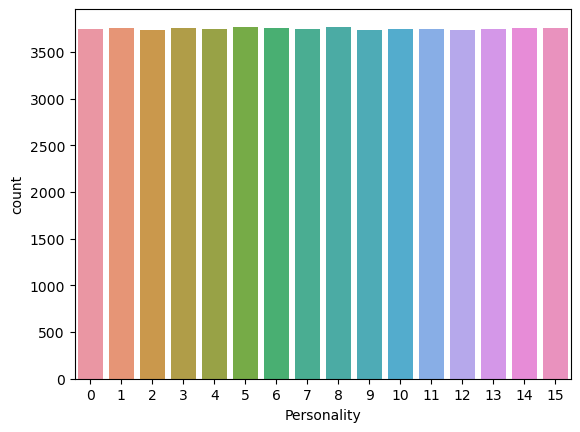

In [ ]:
sns.countplot(y)

<h3>Naive Bayes</h3>
For the Naive Bayes model, all classification tests yielded fairly accurate results. Despite the modification of parameters among the three trials, the results were all similar. The second configuration, in which the fit_prior was set to False and a uniform prior was used, resulted in the most accurate test values. 
<h3>Logistic Regression</h3>
<p>After having done the calculations, it was deduced that the default parameters of the logistic regression in configuration 1 and the liblinear parameter in configuration 3 performed the best. Having the highest overall precision and recall scores.

For the second configuration, we used the parameter fit_intercept and set it to false (whose default value is true). The parameter fit_intercept refers to the constant number being added to the logistic regression function. 

Since the sigmoid function is used to predict the probability of a binary variable, the accuracy of our features could be compromised since our features are non-binary.</p>
<h3> MLP</h3>
<p> For this model, the parameters tinkered with were the max_iter, hidden_layer_sizes, and activation parameters. The default configuration yielded the most accurate results with precision scores in the high 90s(0.90+). This configuration contained 1 hidden layer of 100 neural nodes and the max_iter was set to 200, meaning that the solver would iterate 200 times to train the weights or until convergence. However, with this configuration, 200 iterations was not enough to reach convergence, so the model could still be improved immensely with more iterations. 
    In configuration 2, the max_iter was increased to 600 to attempt reaching convergence, with all other default parameters remaining the same. Although convergence was reached, the results yielded were marginally less accurate than those of configuration 1. This could be because the number of iterations was too high to the point of the error beginning to increase again. However, configuration 2 still performed better than configuration 3. 
    Configuration 3 had max_iter=600, hidden_layer_sizes=(75,25) which means 75 hidden layers with 25 nodes, and and a logistic activation function. Although there were 600 iterations, the model did not reach convergence. This could be attributed to the increase in hidden layers which may be disproportionate to the complexity of the problem, causing the data to become overfitted. This would mean that the model can classify the training samples with high accuracy, but fails with new data because it is too closely fitted with the training data. Moreover, the logistic activation function is better suited for binary features, which none of the features in this dataset are.</p>

<h3> False Positives and False Negatives</h3>
To analyze the occurences of false positives and negatives, we will observe the confusion matrix of Naive Bayes - Configuration 1:

In [ ]:
print(confusion_matrix(y, nb1_all_preds))

[[3416   86    5    6   34    4    4   22    9   23   52   22   35    6
     1   18]
 [  47 3516    7   11   24    9    7    5    6    5   43   44   15    9
     7    5]
 [  20    5 3496    6   16   18    9   13    8   61   24    6    3   24
    24    4]
 [  27   15   64 3520   16    5   18    7    8    6    1    6   12   41
     6    8]
 [ 117   90   22   17 2786   28   58  100   92   30  139  152   19   32
    37   27]
 [  11   41    8    2   24 3472   36   39   19    6    8   26   21    6
    11   39]
 [   6   31   18   14   96   22 3307    9   23   59   13   44   56   22
    28   11]
 [  11   10   13    9  118   40    1 3457   15   19   17   11    5    2
    16    5]
 [   5    5    9   15   60   30   15   24 3313   39   26   53    9   36
   112   10]
 [ 129   16  119    6   36    3   64   71   59 3023   26   11  112   21
    29    9]
 [  22   19    5   12   66   12    3   21   20   15 3382   39   59   16
    40   12]
 [  15   18    4   14   31   17    3   10    6    9  171 3376   1

We will analyze the "0" personality type, the ENFJ. In total, there were 478 False Positives. Personality type 3(ENTP) and 8(INFJ) recorded the highest number of False Positives, with their amounts in the 100s. This could be because the personality types are similar and therefore answer certain questions the same way. In terms of False Negatives, the most notable example for Personality type 0 was personality type 1(ENFP), accounting for 86 of the False Negatives. Similar to the False Positives, this could be attributed to the similarities between the two types in their behaviour and in turn their possible answers to the test questions. 

<h2>References</h2>

Dataset: https://www.kaggle.com/datasets/anshulmehtakaggl/60k-responses-of-16-personalities-test-mbt
https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/
https://www.tutorialspoint.com/scikit_learn/scikit_learn_classification_with_naive_bayes.htm
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
